In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import os
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

os.chdir('C:/Users/L/Desktop/Vasilis\Work/UC Berkeley/Courses/Fall 2017/Data-X/Project/Project depository/cartilage-x/edema')
print (os.getcwd())

C:\Users\L\Desktop\Vasilis\Work\UC Berkeley\Courses\Fall 2017\Data-X\Project\Project depository\cartilage-x\edema


In [2]:
#mris and segs are the lists that include the names of mris and segmentations respectively 

mris = [f for f in os.listdir('../../mri/') ]

segs = [f for f in os.listdir('../../seg/') ]
segs


['AFACL2005_01.mat',
 'AFACL2006_01.mat',
 'AFACL2007_01.mat',
 'AFACL2008_01.mat',
 'AFACL2009_01.mat',
 'AFACL2011_01.mat',
 'AFACL2012_01.mat',
 'AFACL2013_01.mat',
 'AFACL2014_01.mat',
 'AFACL2015_01.mat',
 'AFACL2016_01.mat',
 'AFACL2017_01.mat',
 'AFACL2018_01.mat',
 'AFACL2019_01.mat',
 'AFACL2020_01.mat',
 'AFACL2021_01.mat',
 'AFACL2022_01.mat',
 'AFACL3001_01.mat',
 'AFACL3002_01.mat',
 'AFACL3003_01.mat',
 'AFACL3005_01.mat',
 'AFACL3006_01.mat',
 'AFACL3007_01.mat',
 'AFACL3008_01.mat']

In [3]:
#mri and seg are dictionaries which have as keys the names and as values a numpy array representing the mri and seg respectively

print(os.getcwd())
mri={}
seg={}

for i in range(len(mris)):

    mri[mris[i]] = scipy.io.loadmat('../../mri/' + mris[i])['im_store']

    seg[segs[i]] = scipy.io.loadmat('../../seg/' + segs[i])['pred_con_vol']
    print(np.shape(mri[mris[i]]))

C:\Users\L\Desktop\Vasilis\Work\UC Berkeley\Courses\Fall 2017\Data-X\Project\Project depository\cartilage-x\edema
(512, 512, 112)
(512, 512, 216)
(512, 512, 248)
(512, 512, 199)
(512, 512, 208)
(512, 512, 208)
(512, 512, 240)
(512, 512, 216)
(512, 512, 216)
(512, 512, 216)
(512, 512, 248)
(512, 512, 224)
(512, 512, 224)
(512, 512, 248)
(512, 512, 216)
(512, 512, 224)
(512, 512, 216)
(512, 512, 220)
(512, 512, 224)
(512, 512, 236)
(512, 512, 212)
(512, 512, 232)
(512, 512, 208)
(512, 512, 232)


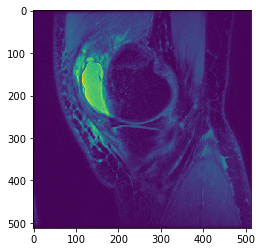

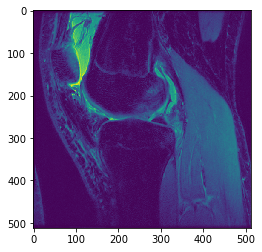

intensity of 50th slice 0.107794177943
intensity of 90th slice 0.129026171921
0.0461839827243 0
0.0476173847407 1
0.0496425641056 2
0.0515924451835 3
0.0554013967764 4
0.0569115205182 5
0.0541045186902 6
0.0536426361889 7
0.0565765754935 8
0.0569421234073 9
0.0560156448786 10
0.0519572748341 11
0.0512742049554 12
0.0596548472773 13
0.0609579309698 14
0.0674189386856 15
0.0707141400199 16
0.0719267303365 17
0.0680612349274 18
0.0687315569767 19
0.0727288921342 20
0.074606608319 21
0.0812551836976 22
0.0837291684358 23
0.0881745775385 24
0.0909274774399 25
0.088273645844 26
0.0935440432773 27
0.0928963344408 28
0.095334162977 29
0.096737383981 30
0.10204821771 31
0.106561874481 32
0.108659891792 33
0.107287274458 34
0.105143514131 35
0.115527364481 36
0.118545159873 37
0.110161180107 38
0.11332093276 39
0.118409715416 40
0.117403320927 41
0.11457653666 42
0.1165117661 43
0.114028786508 44
0.114667541006 45
0.113777338213 46
0.111875655904 47
0.109315859917 48
0.108017867818 49
0.10779417

In [4]:
#Find average intensity of each layer and remove the ones that have too much intensity since they are obviously noise, let's make sense
#out of just one. We will find the intensity of each layer and store it into a new dictionary 

intensity={}
i=50
j=90
matrix=mri['AFACL2006_01.mat']
intensity[i]=np.average(matrix[:,:,i])
intensity[j]=np.average(matrix[:,:,j])
plt.imshow(matrix[:,:,i])
plt.show()
plt.imshow(matrix[:,:,j])
plt.show()

print ('intensity of '+str(i)+'th slice' , intensity[i])
print ('intensity of '+str(j)+'th slice' , intensity[j])

for i in range(np.shape(matrix)[2]):
    print(np.average(matrix[:,:,i]),i)
    


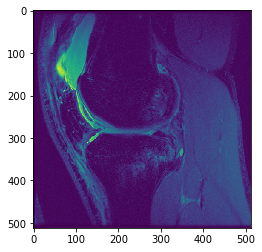

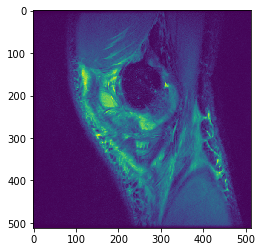

intensity of 70th slice 0.115841186571
intensity of 100th slice 0.163700180018


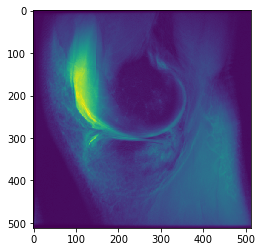

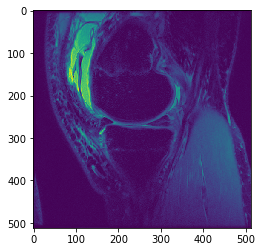

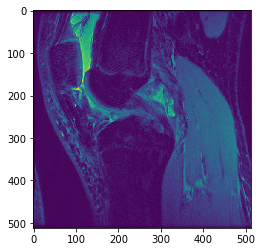

intensity of 70th slice 0.107147996417
intensity of 100th slice 0.129061971553


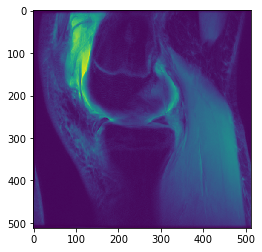

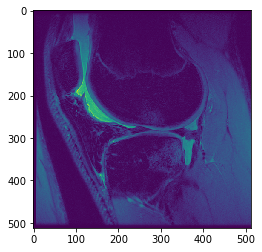

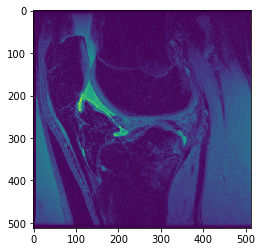

intensity of 70th slice 0.113746384464
intensity of 100th slice 0.120457493915


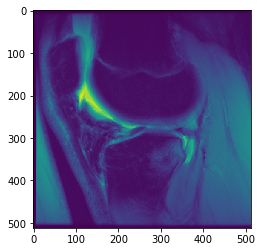

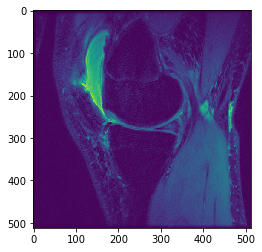

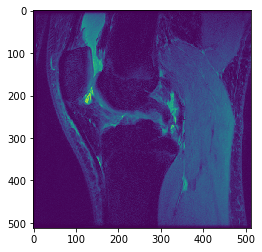

intensity of 70th slice 0.113613679759
intensity of 100th slice 0.121246391135


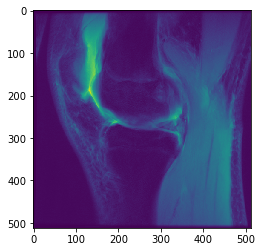

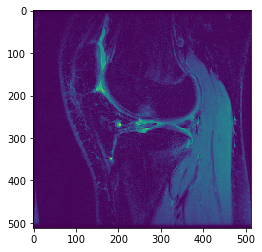

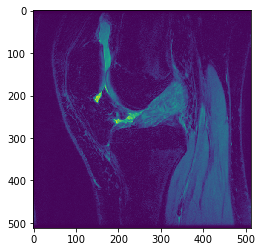

intensity of 70th slice 0.0950082885432
intensity of 100th slice 0.0913007554816


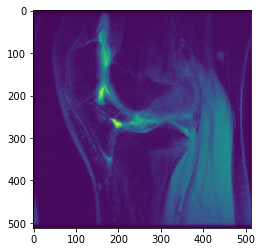

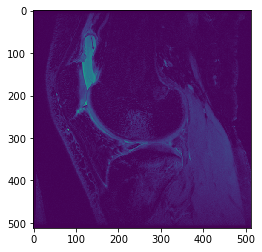

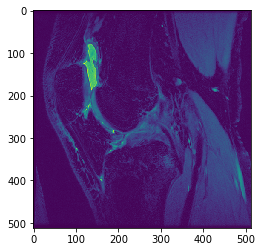

intensity of 70th slice 0.0494271425767
intensity of 100th slice 0.0905339452074


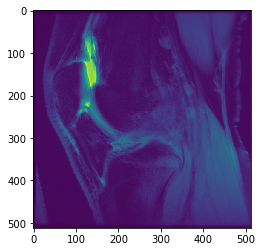

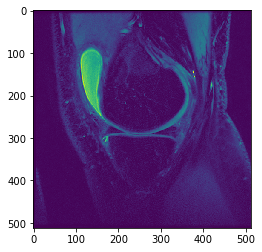

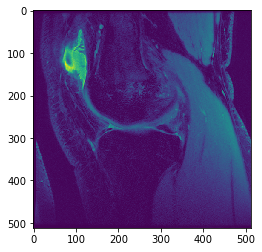

intensity of 70th slice 0.0910554502513
intensity of 100th slice 0.116731319309


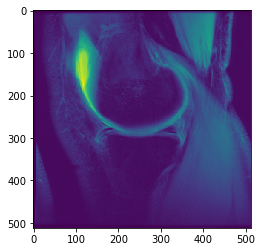

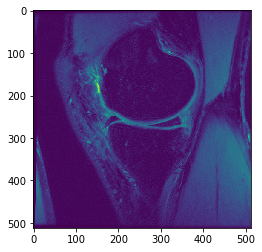

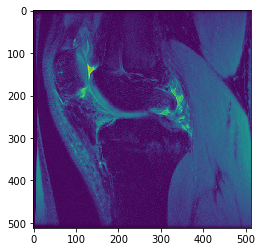

intensity of 70th slice 0.111572243737
intensity of 100th slice 0.150502496235


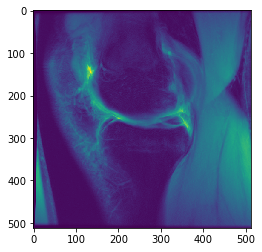

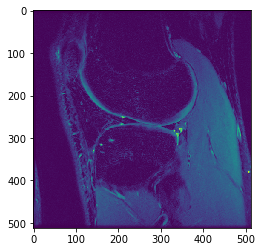

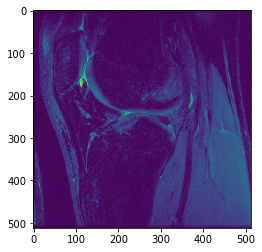

intensity of 70th slice 0.1049481622
intensity of 100th slice 0.0932650976052


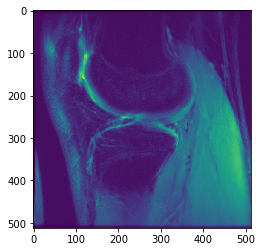

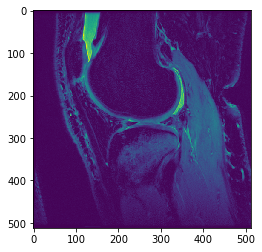

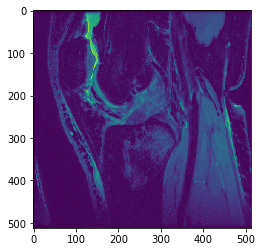

intensity of 70th slice 0.0944519743427
intensity of 100th slice 0.099540523234


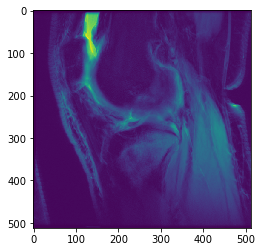

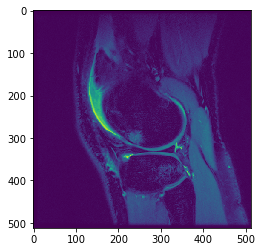

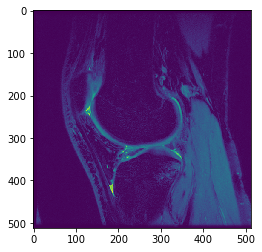

intensity of 70th slice 0.0835654526178
intensity of 100th slice 0.0823897833863


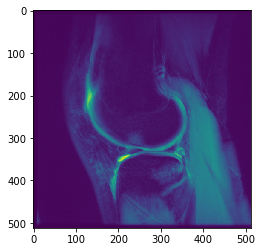

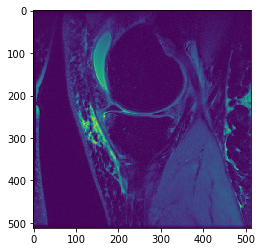

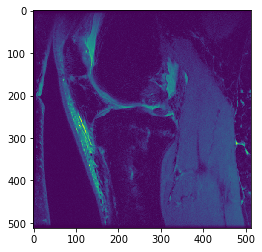

intensity of 70th slice 0.0968275029666
intensity of 100th slice 0.101947264995


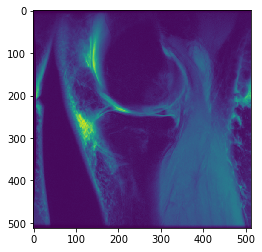

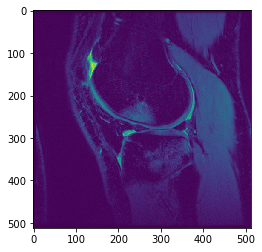

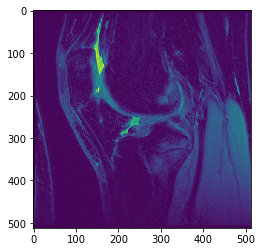

intensity of 70th slice 0.0744893197542
intensity of 100th slice 0.0893426350634


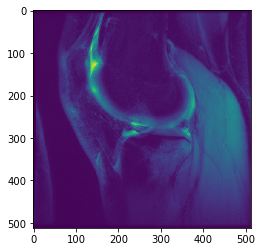

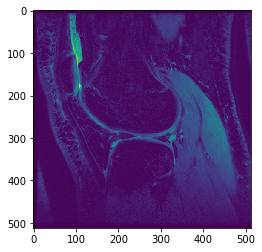

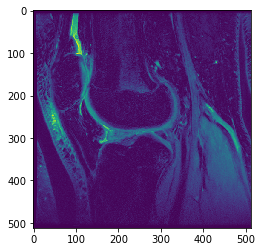

intensity of 70th slice 0.0792812605591
intensity of 100th slice 0.104223843078


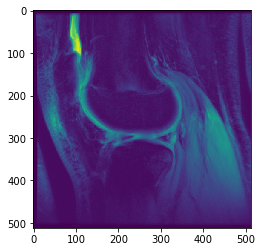

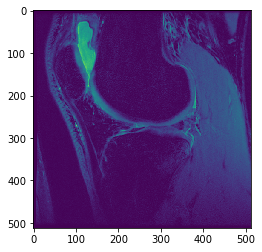

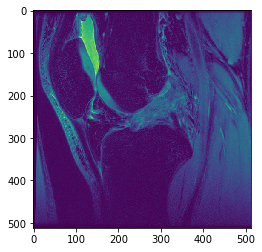

intensity of 70th slice 0.0959420985385
intensity of 100th slice 0.129645578522


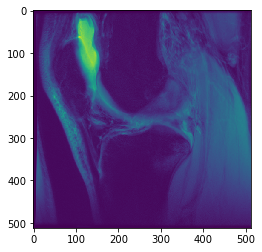

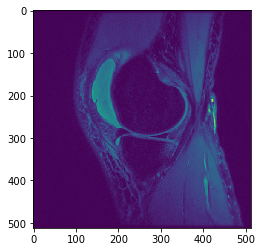

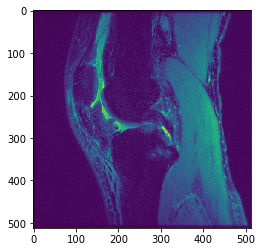

intensity of 70th slice 0.0836419647815
intensity of 100th slice 0.137458980418


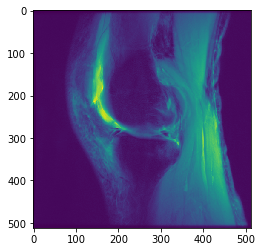

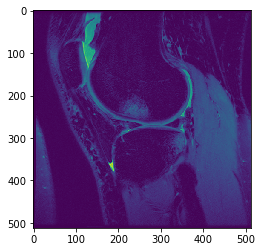

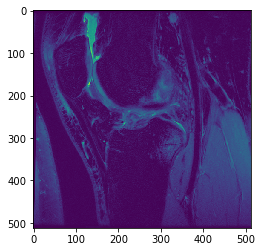

intensity of 70th slice 0.0854205490422
intensity of 100th slice 0.087826443193


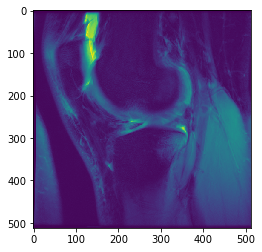

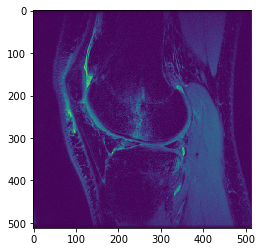

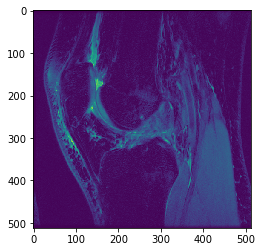

intensity of 70th slice 0.0836449357014
intensity of 100th slice 0.0919489474744


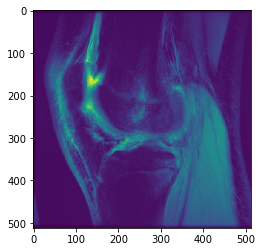

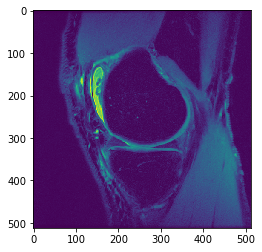

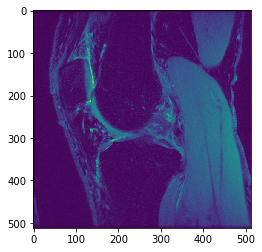

intensity of 70th slice 0.112307675124
intensity of 100th slice 0.12365348215


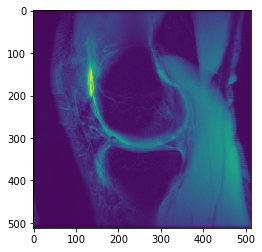

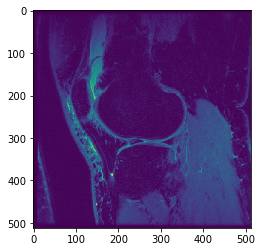

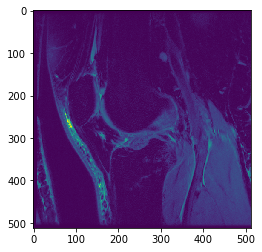

intensity of 70th slice 0.0852620189727
intensity of 100th slice 0.0740873666296


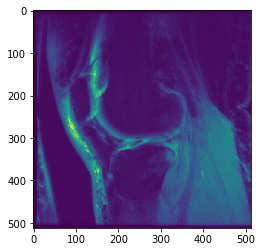

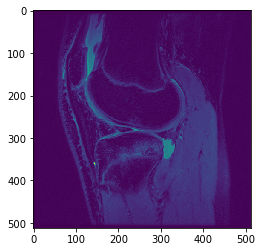

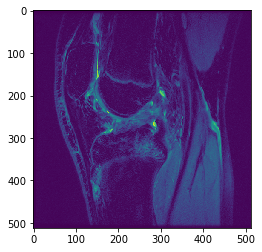

intensity of 70th slice 0.0626276836494
intensity of 100th slice 0.0892495269178


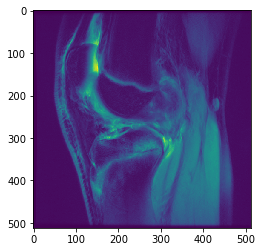

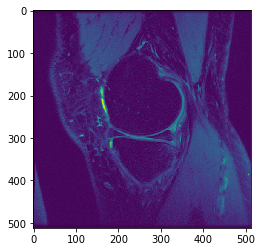

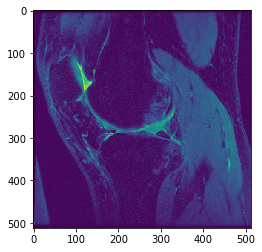

intensity of 70th slice 0.0940713255241
intensity of 100th slice 0.11627621941


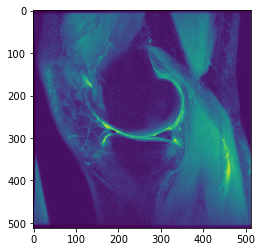

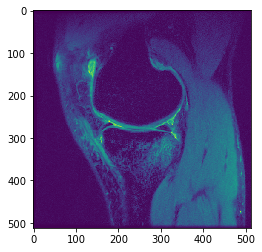

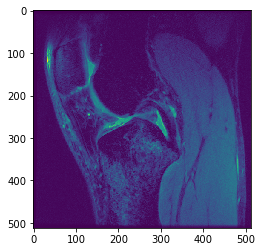

intensity of 70th slice 0.140414787061
intensity of 100th slice 0.125727572422


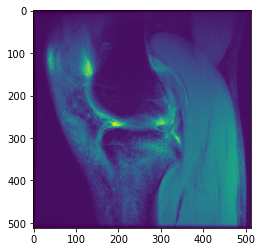

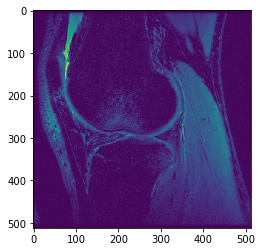

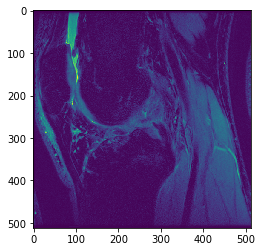

intensity of 70th slice 0.0965595132417
intensity of 100th slice 0.0991101327082


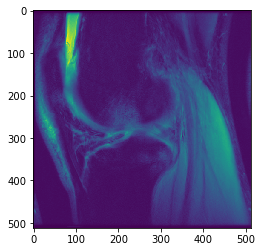

In [5]:
#Let iterate over the different images.
ave={}
for i in range(len(mris)):
    intensity={}
    k=70
    j=100
    matrix=mri[mris[i]]
    intensity[k]=np.average(matrix[:,:,k])
    intensity[j]=np.average(matrix[:,:,j])
    plt.imshow(matrix[:,:,k])
    plt.show()
    plt.imshow(matrix[:,:,j])
    plt.show()

    print ('intensity of '+str(k)+'th slice' , intensity[k])
    print ('intensity of '+str(j)+'th slice' , intensity[j])
    ave[i]=np.average(matrix[:,:,k:j],axis=2)
    plt.imshow(ave[i])
    plt.show()




###  What have we done so far? A dictionary of average arrays from slice k to slice j 



In [6]:
np.shape(ave[0])

(512, 512)

In [7]:
#Now we should flatten the image to transform it from a 2-D average to a vector 
vector={}
for i in range(len(mris)):
    
    vector[i]=np.ravel(ave[i])
    


In [8]:
#Now let's stack one vector on top of the other to create an array 

z=np.zeros(512*512,)
for i in range(len(mris)):
    z=np.vstack((z,vector[i]))

z=np.delete(z,0,axis=0) #I just deleteed the first row which I created

np.shape(z)

(24, 262144)

In [9]:
# Let's now manually create a column (np.array) that includes all the edema scores, and let's reform them having as many cols as the possible outcomes
y=np.array([3,3,2,3,1,3,3,1,3,0,2,0,3,0,0,1,2,3,0,0,2,0,3,3])
r=np.zeros((24,4))

r[12,3]=1
for i,k in enumerate(y):
    r[i,k]=1
#y=r
#y_t=y[0:20]
x_train=z[0:20].astype(np.float32)
#y_a=y[20:24]
x_test=z[20:24].astype(np.float32)
y_train=y[0:20].astype(np.float32)
y_test=y[20:24].astype(np.float32)

In [10]:
#We will later on have to split the data randomly but for the time being lets say that first 20 is our training and last 4 is 
#our test set 

### We are done with the preprocessing, let's fit the data into a neural network

In [11]:
# Pyton 2 and 3 support
from __future__ import division, print_function,unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Canonical way of importing TensorFlow
import tensorflow as tf

# If this doesn't work TensorFlow is not installed correctly

In [13]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

# Then every time you have specified a graph run:
# file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [14]:
# loads autoreload command
%load_ext autoreload
# reloads every module before executing
%autoreload 2 
from graph_vis import show_graph as sg

In [15]:
# Read in input data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# contains info
import tensorflow.examples.tutorials.mnist.mnist as mnist_info


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [36]:
# Define hyperparameters and input size

n_inputs = 512*512  # Inputs
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10
dropout = 0.20 # Dropout, probability to keep units

In [18]:
# Reset graph
tf.reset_default_graph()

In [19]:
# Placeholders for data (inputs and targets)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
keep_prob = tf.placeholder(tf.float32)

In [20]:
# Define neuron layers (ReLU in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="kernel")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # Output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [21]:
# Define the hidden layers
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.leaky_relu)
    drop_out = tf.nn.dropout(hidden1, keep_prob)
    hidden2 = neuron_layer(drop_out, n_hidden2, name="hidden2",
                           activation=tf.nn.leaky_relu)
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3",activation=tf.nn.leaky_relu)
    logits = neuron_layer(hidden3, n_outputs, name="outputs")
    
    

In [22]:
# Define loss function (that also optimizes Softmax for output):

with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [23]:
# Training step with Gradient Descent

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [24]:
# Evaluation to see accuracy

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [25]:
sg(tf.get_default_graph())

In [26]:
np.shape(x_train)[0]
x_train[0:20,:]
type(x_train[0,1])

numpy.float32

In [37]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
batch_size = 2
asd=0
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #for iteration in range(mnist.train.num_examples // batch_size):
        for iteration in range(np.shape(x_train)[0] // batch_size):
            asd=asd+1
            #X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = x_train[iteration*batch_size:iteration*batch_size+batch_size,:]
            y_batch = y_train[iteration*batch_size:iteration*batch_size+batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, keep_prob:1-dropout})
        print (asd)
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch, keep_prob:1})
        acc_val = accuracy.eval(feed_dict={X: x_test, y:y_test, keep_prob:1})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt") # save model

10
0 Train accuracy: 1.0 Val accuracy: 0.25
20
1 Train accuracy: 0.5 Val accuracy: 0.5
30
2 Train accuracy: 1.0 Val accuracy: 0.25
40
3 Train accuracy: 1.0 Val accuracy: 0.25
50
4 Train accuracy: 1.0 Val accuracy: 0.25
60
5 Train accuracy: 1.0 Val accuracy: 0.25
70
6 Train accuracy: 1.0 Val accuracy: 0.25
80
7 Train accuracy: 1.0 Val accuracy: 0.25
90
8 Train accuracy: 1.0 Val accuracy: 0.25
100
9 Train accuracy: 1.0 Val accuracy: 0.25
110
10 Train accuracy: 1.0 Val accuracy: 0.25
120
11 Train accuracy: 1.0 Val accuracy: 0.25
130
12 Train accuracy: 1.0 Val accuracy: 0.25
140
13 Train accuracy: 1.0 Val accuracy: 0.25
150
14 Train accuracy: 1.0 Val accuracy: 0.25
160
15 Train accuracy: 1.0 Val accuracy: 0.5
170
16 Train accuracy: 1.0 Val accuracy: 0.5
180
17 Train accuracy: 1.0 Val accuracy: 0.25
190
18 Train accuracy: 1.0 Val accuracy: 0.5
200
19 Train accuracy: 1.0 Val accuracy: 0.25


In [38]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = x_test
    Z = logits.eval(feed_dict={X: x_test, keep_prob:1})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
Predicted classes: [0 0 0 0]
Actual classes:    [ 2.  0.  3.  3.]


# Failed attempts 

In [ ]:
#The first image that has intensity below 0.12 will be the first slice to be used and the last slice will be the first one to have more than 0.12 
matrix=mri['AFACL2006_01.mat']

first_slice=0
last_slice=0

for i in range(np.shape(matrix)[2]):
    print(np.average(matrix[:,:,i]),i)
    if (np.average(matrix[:,:,i])<0.12):
        first_slice=i
        break
for i in range(first_slice,np.shape(matrix)[2]):
    if (np.average(matrix[:,:,i])>0.12):
        last_slice=i
        break
print("first slice", first_slice)
print('last slice', last_slice)

In [ ]:
#Let's flatten the numpy arrays, turns out we cannot use the 3D matrix

for i in range(len(mris)):#Create a numpy array which has as rows each raveled array

z=np.zeros(np.shape(mri['AFACL2005_01.mat']))
for i in range(len(mris)):
    print( "new shape" ,np.shape(mri[mris[i]]))
    print( "old shape", np.shape(z))
    z=np.vstack((z,mri[mris[i]]))
z
    mri[mris[i]] = np.ravel(mri[mris[i]])
    print(np.shape(mri[mris[i]]))

In [ ]:
#Let's load the score for each one of the mris manually 
df=pd.DataFrame(eval(mri))
#mri['Edema']=[3,3,2,3,1,3,3,1,3,0,2,0,3,0,0,1,2,3,0,0,2,0,3,3]

In [ ]:
#Let's load the score for each one of the mris manually 
pd_mri80['ID']=[mris[i] for i in range(len(mris))]
pd_mri80=pd_mri80.set_index(pd_mri80['ID']).drop('ID', axis=1)
pd_mri80['Y']=[3,3,2,3,1,3,3,1,3,0,2,0,3,0,0,1,2,3,0,0,2,0,3,3]
pd_mri80
